# Introduction

Home Credit, a non-banking financial institution founded in 1997 in the Czech Republic, operates in 14 countries, including the U.S., Russia, China, and India. It specializes in lending to individuals with little or no credit history, serving over 29 million customers with €21 billion in assets and 160 million loans (as of May 2018). The company leverages alternative data, such as telco and transactional information, to assess creditworthiness.

## Loading the data

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
application_train = pd.read_csv("application_train.csv")
application_test = pd.read_csv("application_test.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
bureau = pd.read_csv("bureau.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
POS_CASH_balance = pd.read_csv("POS_CASH_balance.csv")
previous_application = pd.read_csv("previous_application.csv")

# Data Model

From data description on competion page.

![Data Model](data_model_image.png)

The **application_train** and **application_test** datasets contain loan and applicant details. The **bureau** dataset includes records of loans taken by applicants from other financial institutions, as reported to the credit bureau. The **previous_applications** dataset provides details of past loans taken by applicants from Home Credit.

- **`SK_ID_CURR`** links **application_train** and **application_test** with **bureau**, **previous_applications**, **POS_CASH_balance**, **installments_payment**, and **credit_card_balance**.
- **`SK_ID_PREV`** links **previous_applications** with **POS_CASH_balance**, **installments_payment**, and **credit_card_balance**.
- **`SK_ID_BUREAU`** connects the **bureau** dataset with **bureau_balance**.


# Quick look at data

In [91]:
datasets = {
    "application_train": application_train,
    "application_test": application_test,
    "bureau": bureau,
    "bureau_balance": bureau_balance,
    "credit_card_balance": credit_card_balance,
    "installments_payments": installments_payments,
    "previous_application": previous_application,
    "POS_CASH_balance": POS_CASH_balance
}

for name, df in datasets.items():
    print(f"{name} - Rows: {df.shape[0]:,} | Columns: {df.shape[1]}")

application_train - Rows: 307,511 | Columns: 122
application_test - Rows: 48,744 | Columns: 121
bureau - Rows: 1,716,428 | Columns: 17
bureau_balance - Rows: 27,299,925 | Columns: 3
credit_card_balance - Rows: 3,840,312 | Columns: 23
installments_payments - Rows: 13,605,401 | Columns: 8
previous_application - Rows: 1,670,214 | Columns: 37
POS_CASH_balance - Rows: 10,001,358 | Columns: 8


In [92]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [95]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [96]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [97]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [98]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [99]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Checking Missing data

In [100]:
for name, df in datasets.items():
    missing_values = df.isnull().sum().sum()
    missing_percentage = (missing_values / (df.shape[0] * df.shape[1])) * 100
    print(f"{name} - Missing Values: {missing_values:,} ({missing_percentage:.2f}%)")

application_train - Missing Values: 9,152,465 (24.40%)
application_test - Missing Values: 1,404,419 (23.81%)
bureau - Missing Values: 3,939,947 (13.50%)
bureau_balance - Missing Values: 0 (0.00%)
credit_card_balance - Missing Values: 5,877,356 (6.65%)
installments_payments - Missing Values: 5,810 (0.01%)
previous_application - Missing Values: 11,109,336 (17.98%)
POS_CASH_balance - Missing Values: 52,158 (0.07%)


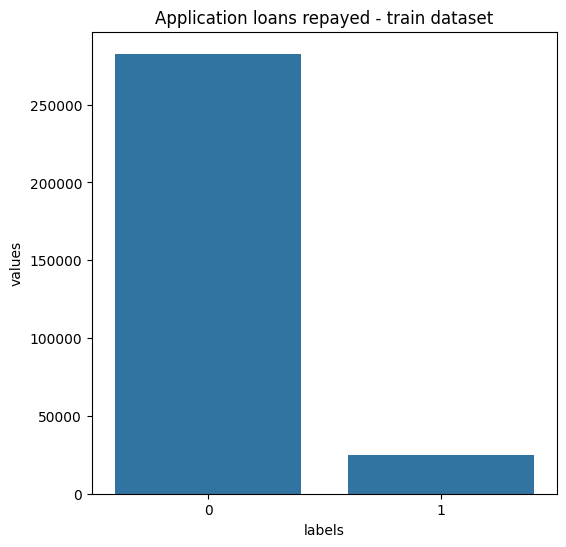

In [101]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

# Exploratory Analysis

### Application Data

We will analyze the distribution of loan types and visualize the percentage of loans that were not repaid (TARGET = 1) for each type. This will help identify common loan types and those with higher default rates.

In [102]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

In [103]:
def plot_distribution(var):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

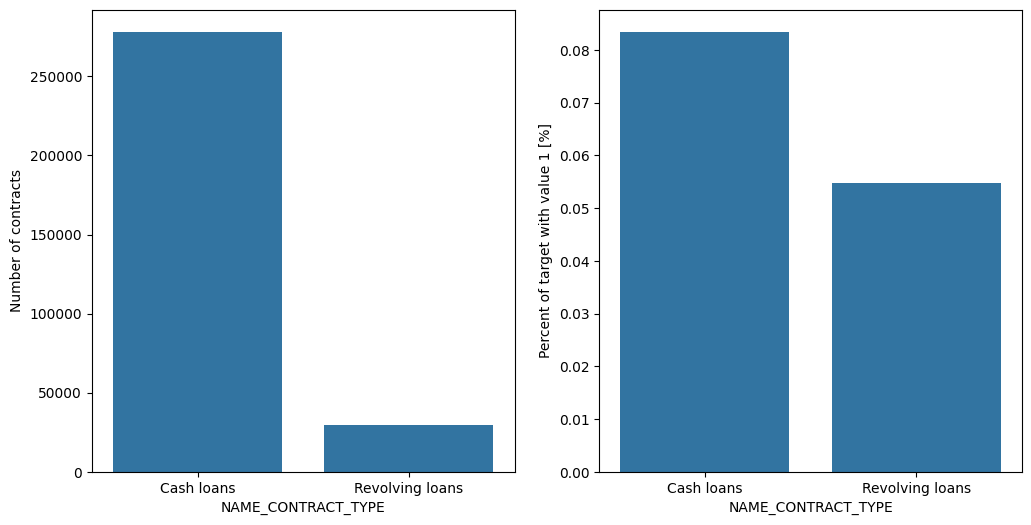

In [104]:
plot_stats('NAME_CONTRACT_TYPE')

Contract type Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

### Client Gender

Let's see the gender of the clients and also, on a separate plot, the percent of the loans (by client gender) with TARGET value 1 (not returned loan).

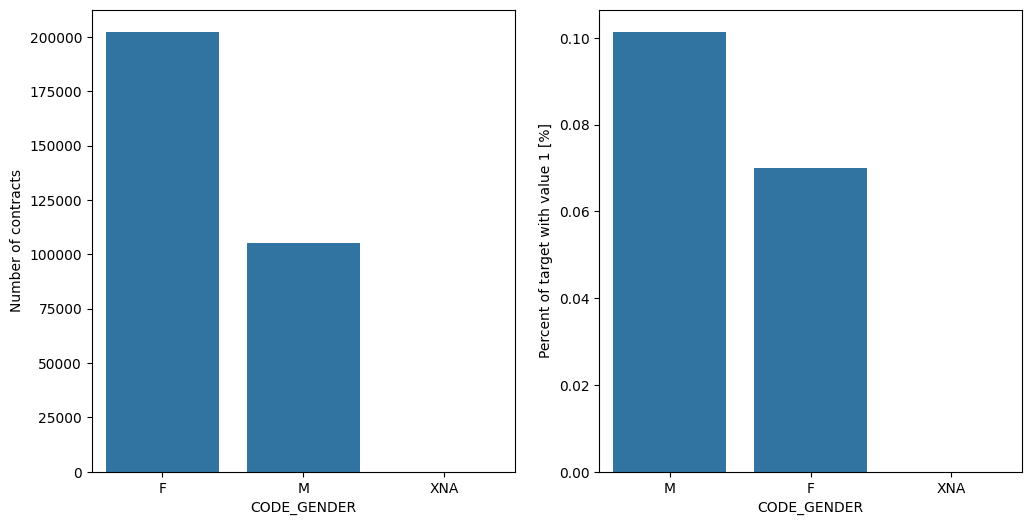

In [105]:
plot_stats('CODE_GENDER')

The number of female clients is almost double the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans (~10%), comparing with women (~7%).

### Flag own car and flag own real estate

Let's inspect the flags that tell us if a client owns a car or real estate and, on separate plots, the percent of the loans value of these flags) with TARGET value 1 (not returned loan).

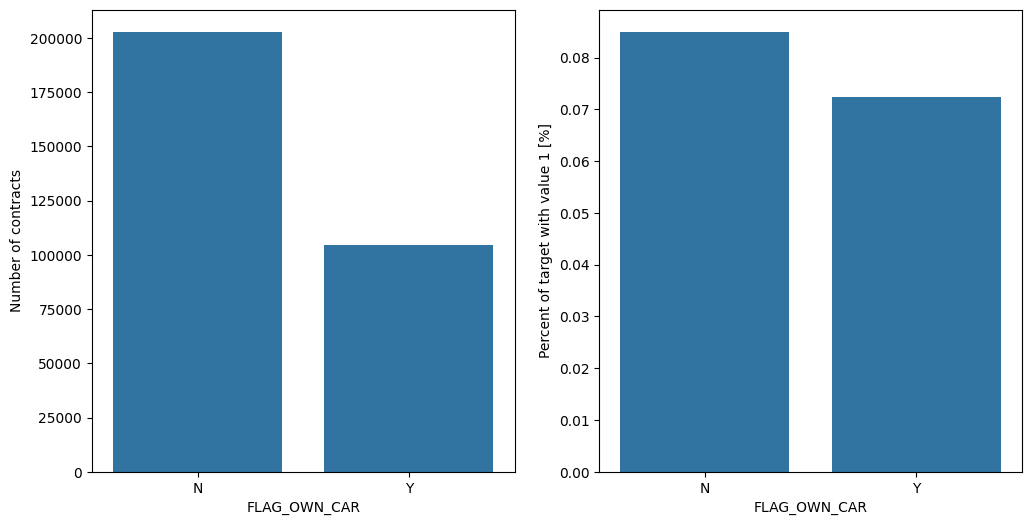

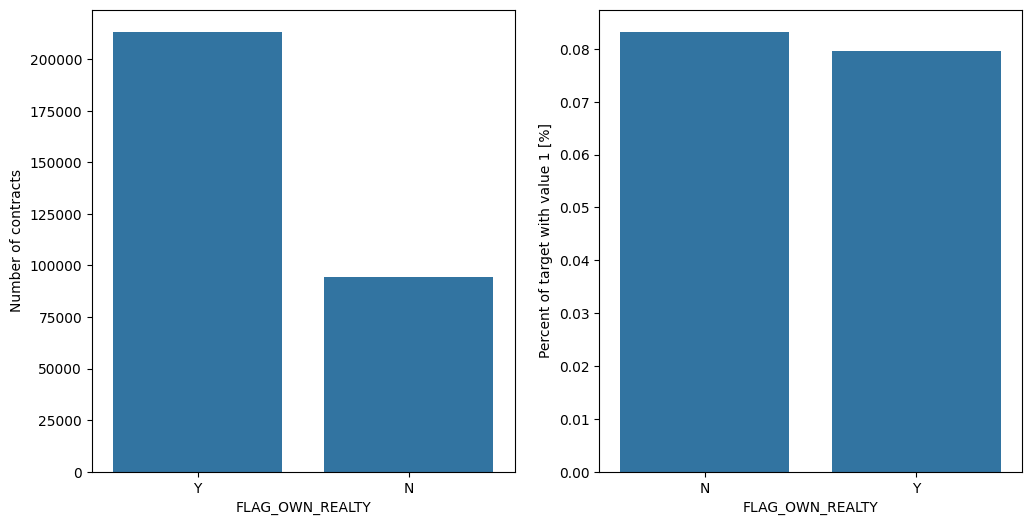

In [106]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

The clients that owns a car are almost a half of the ones that doesn't own one. The clients that owns a car are less likely to not repay a car that the ones that own. Both categories have not-repayment rates around 8%.

The clients that owns real estate are more than double of the ones that doesn't own. Both categories (owning real estate or not owning) have not-repayment rates less than 8%.

### Family status of client

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\243450882.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\243450882.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


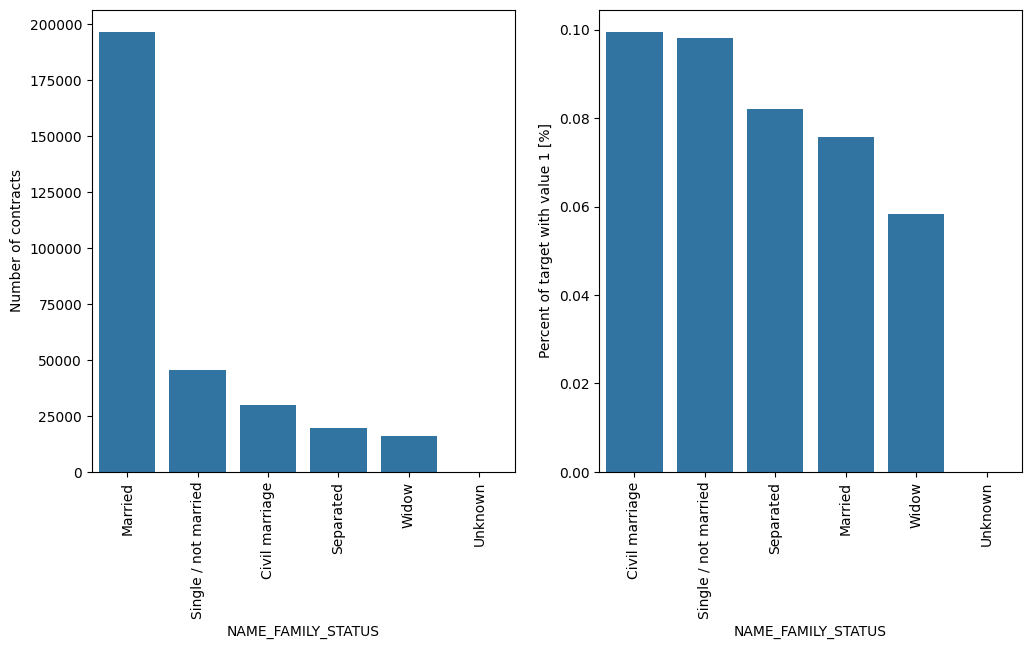

In [107]:
plot_stats('NAME_FAMILY_STATUS',True, True)

Most clients are married, followed by single/not married and civil marriage. Civil marriage has the highest loan non-repayment rate (10%), while widows have the lowest, excluding unknown cases.

### Number of children

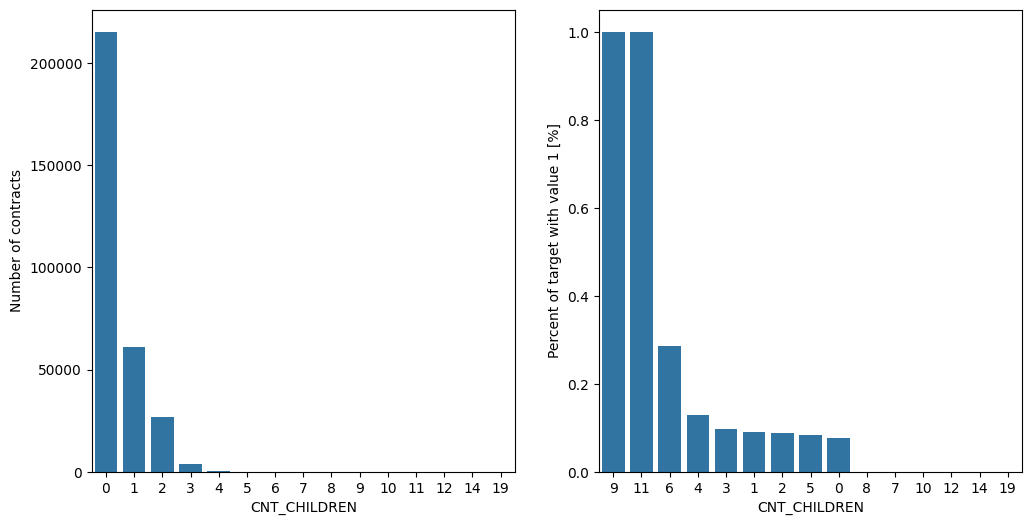

In [108]:
plot_stats('CNT_CHILDREN')

Most loan applicants have no children. Loans for clients with one child are four times fewer, and those with two children are eight times fewer, while loans for clients with three or more children are rare. Loan non-repayment rates for clients with up to three children are around the average (10%), but those with four or six children have higher default rates, exceeding 25% for families with six children. Clients with nine or eleven children have a 100% loan non-repayment rate.

### Number of family members of client

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\243450882.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\243450882.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


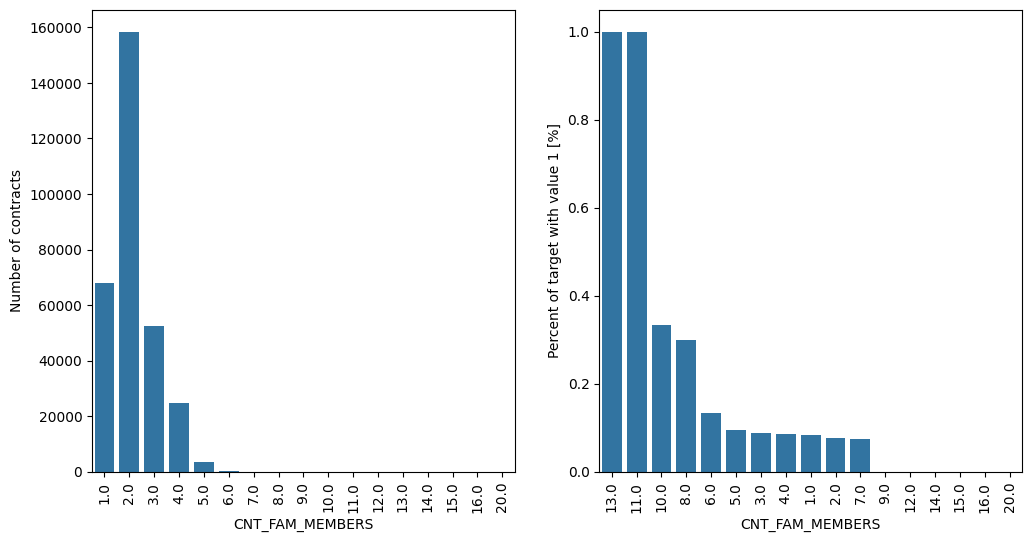

In [109]:
plot_stats('CNT_FAM_MEMBERS',True)

Clients with family members of 2 are most numerous, followed by 1 (single persons), 3 (families with one child) and 4.

Clients with family size of 11 and 13 have 100% not repayment rate. Other families with 10 or 8 members have percents of not repayment of loans over 30%. Families with 6 or less members have repayment rates close to the 10% average.

### Income type of client

Investigating the numbers of clients with different income type, and the percent of clients who did not return loans per income type.

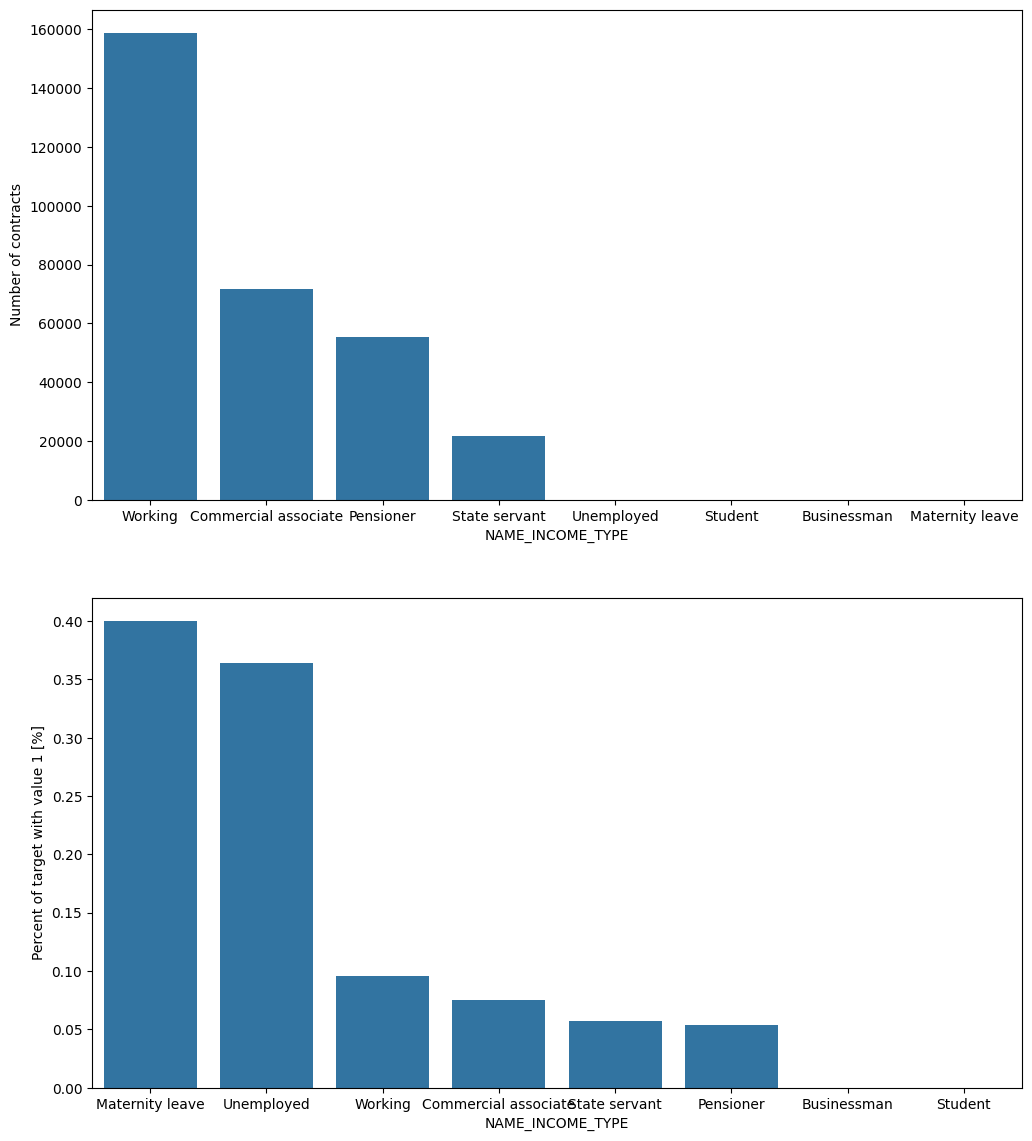

In [110]:
plot_stats('NAME_INCOME_TYPE',False,False)

Most loan applicants have income from working, followed by commercial associates, pensioners, and state servants. Applicants on maternity leave have the highest loan non-repayment rate (40%), followed by the unemployed (37%), while other income types remain below the 10% average.

### Ocupation of client

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\243450882.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\243450882.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


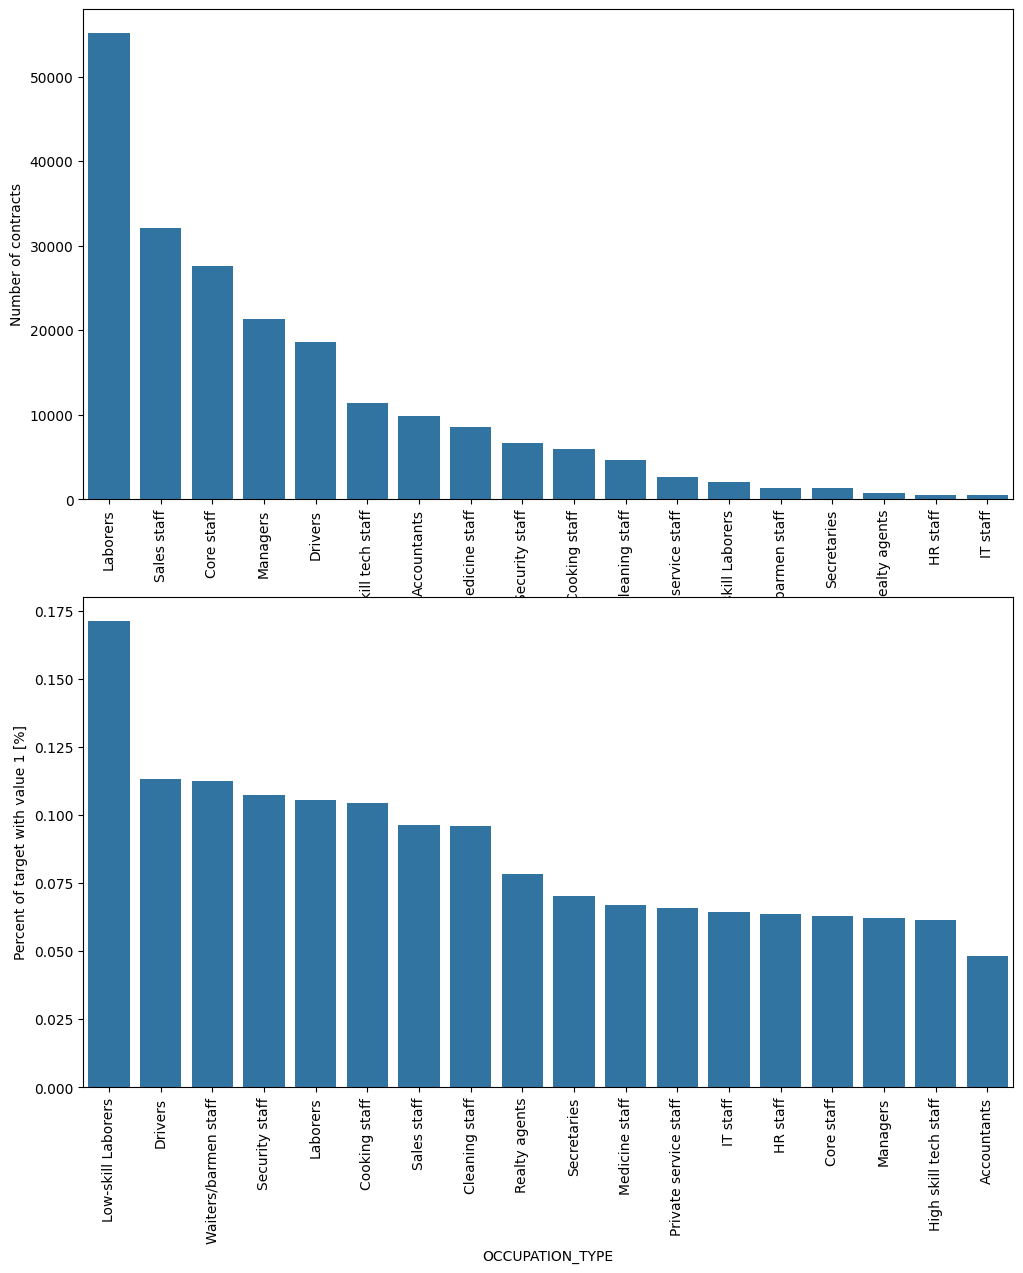

In [111]:
plot_stats('OCCUPATION_TYPE',True, False)

Most loans are taken by laborers, followed by sales staff, while IT staff take the least. Low-skill laborers have the highest loan non-repayment rate (over 17%), followed by drivers, waiters/barmen, security staff, laborers, and cooking staff.

### Organization type

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\243450882.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\243450882.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


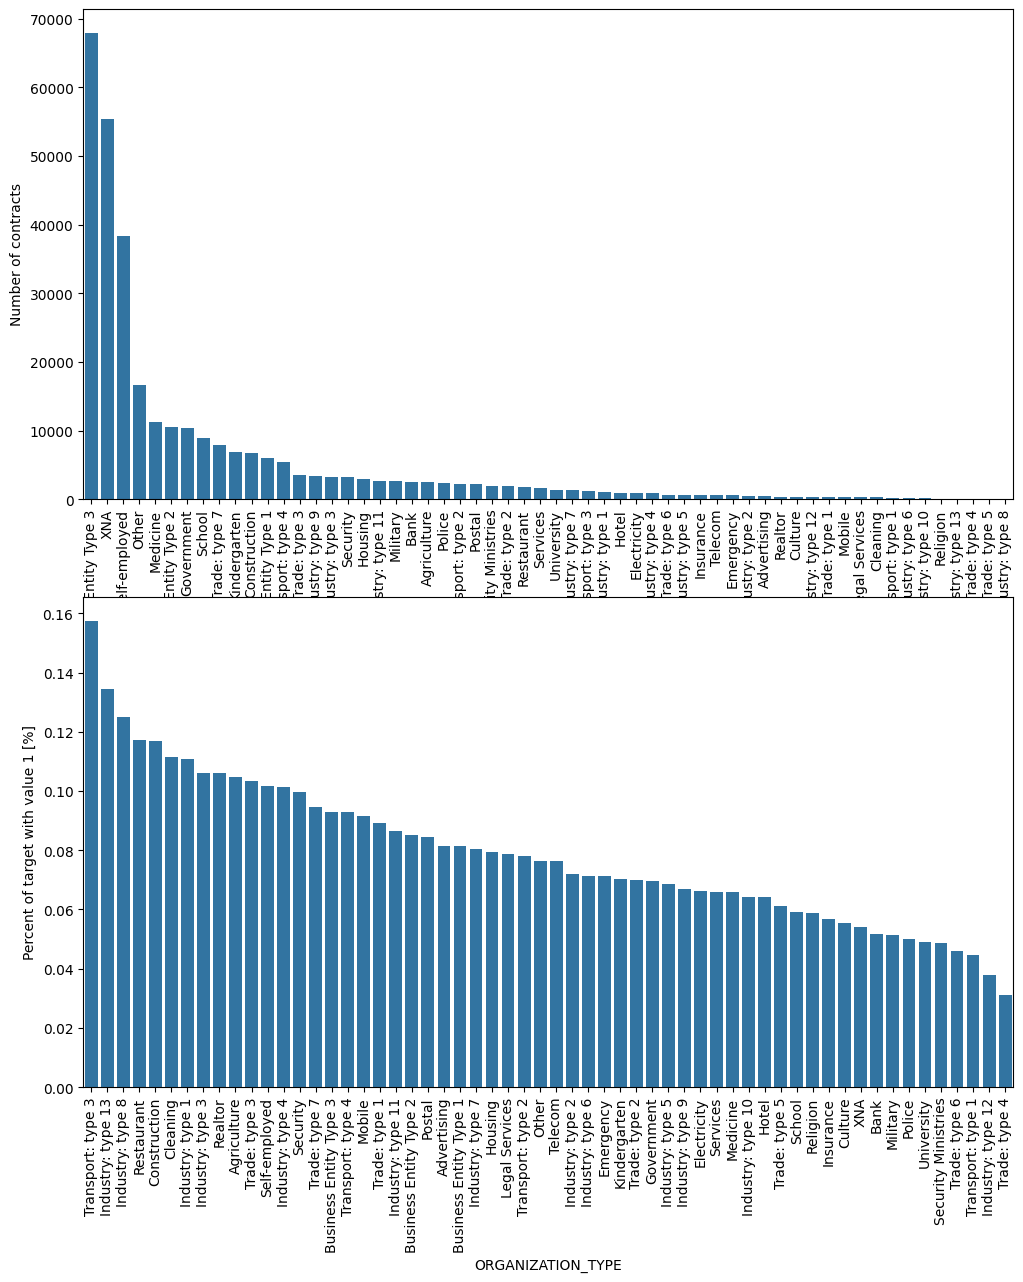

In [112]:
plot_stats('ORGANIZATION_TYPE',True, False)

Organizations with the highest loan non-repayment rates are Transport: Type 3 (16%), Industry: Type 13 (13.5%), Industry: Type 8 (12.5%), and Restaurants (below 12%).

### Education type of the client

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\243450882.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\243450882.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


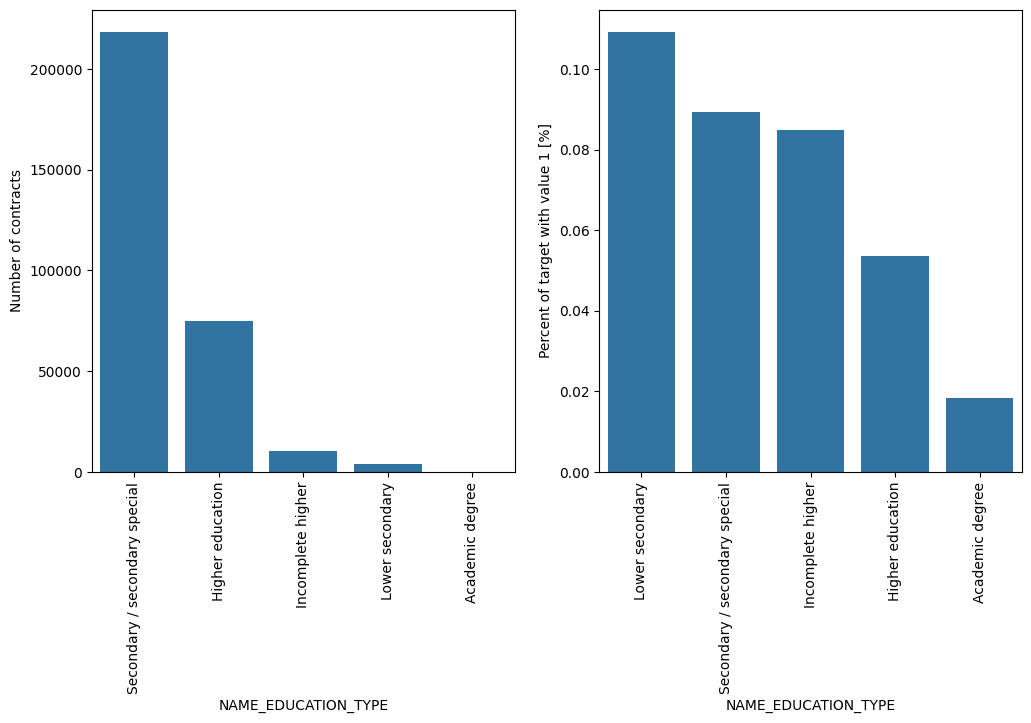

In [113]:
plot_stats('NAME_EDUCATION_TYPE',True)

Most clients have secondary or secondary special education, followed by those with higher education, while very few hold an academic degree. The lower secondary category, though rare, has the highest loan non-repayment rate (11%), whereas those with an academic degree have the lowest (under 2%).

### Type of the housing of client

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\243450882.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\243450882.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


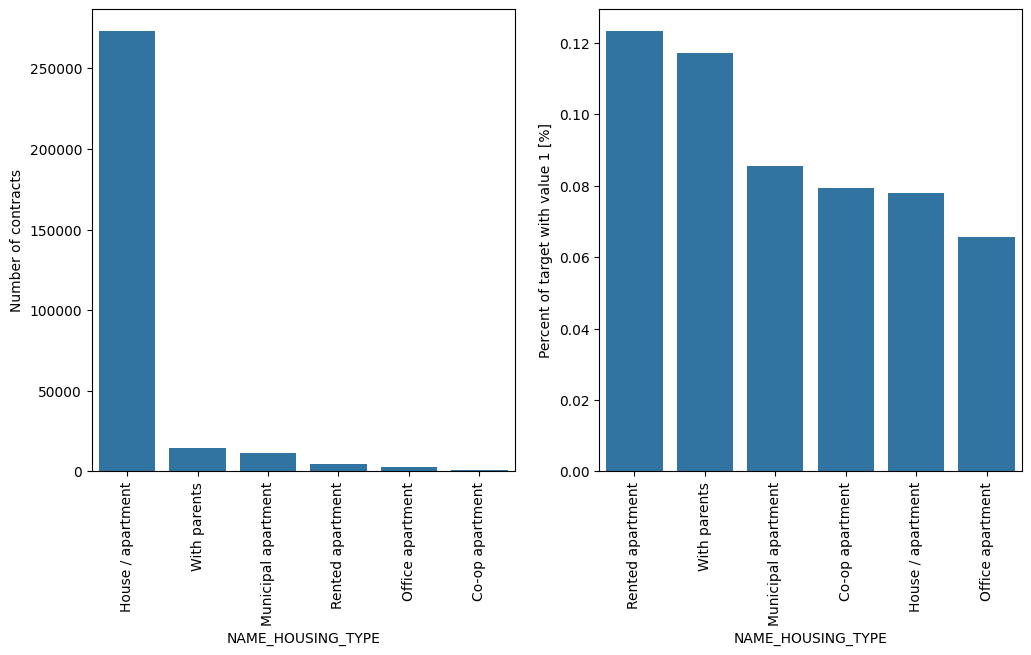

In [114]:
plot_stats('NAME_HOUSING_TYPE',True)

Over 250,000 loan applicants registered their housing as a house or apartment, while categories like "With parents" and "Municipal apartment" have very few clients. Among them, rented apartments and "With parents" have a loan non-repayment rate exceeding 10%.

### Total income distribution

In [115]:
# Plotting distribution of one feature
def plot_distribution(feature, color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.histplot(application_train[feature].dropna(), color=color, kde=True, bins=100)
    plt.show()

In [116]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()


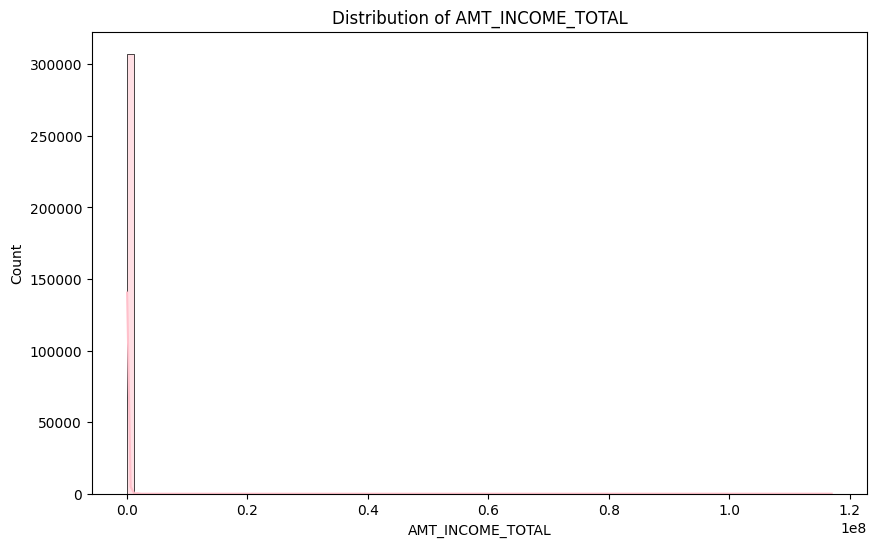

In [117]:
plot_distribution('AMT_INCOME_TOTAL','pink')

### Credit distribution

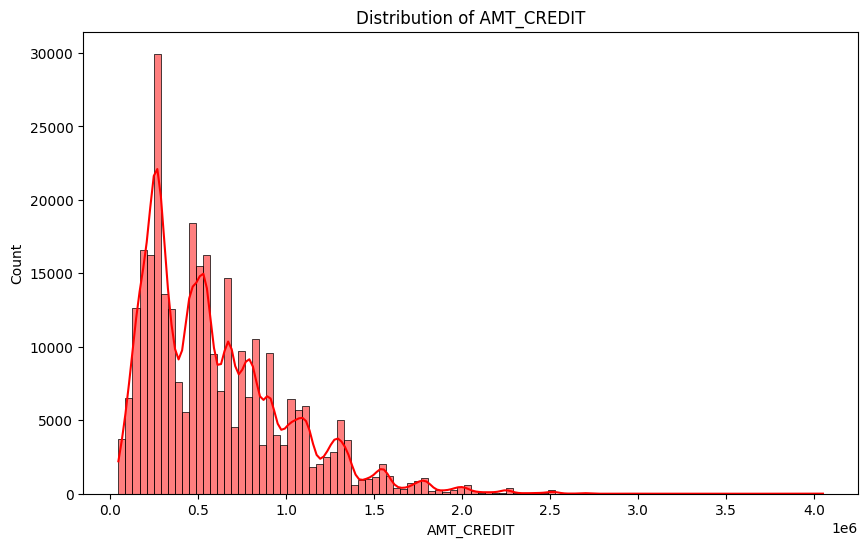

In [118]:
plot_distribution('AMT_CREDIT','red')

### Annuity distribution

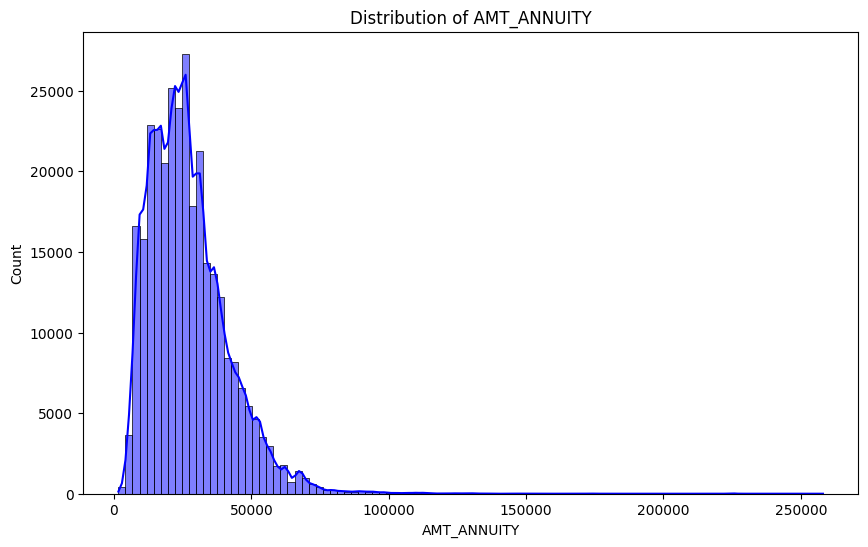

In [119]:
plot_distribution('AMT_ANNUITY','blue')

### Goods price

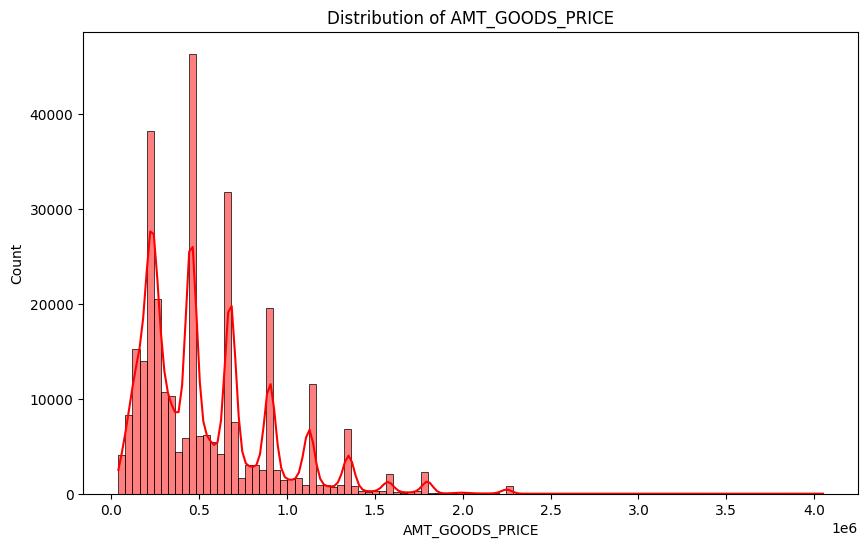

In [120]:
plot_distribution('AMT_GOODS_PRICE','red')

### Days from birth distribution

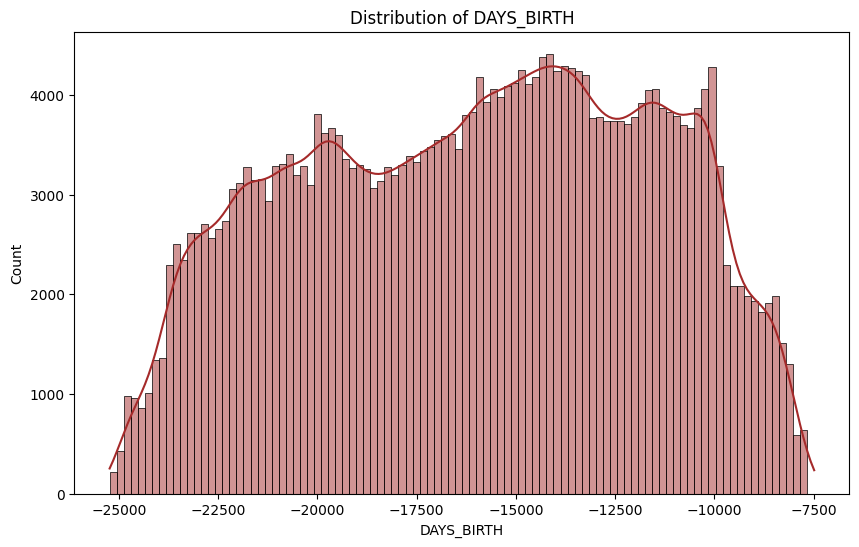

In [121]:
plot_distribution('DAYS_BIRTH','brown')

A negative value signifies a past birth date, resulting in an age range of roughly 20 to 68 years.

### Days employed distribution

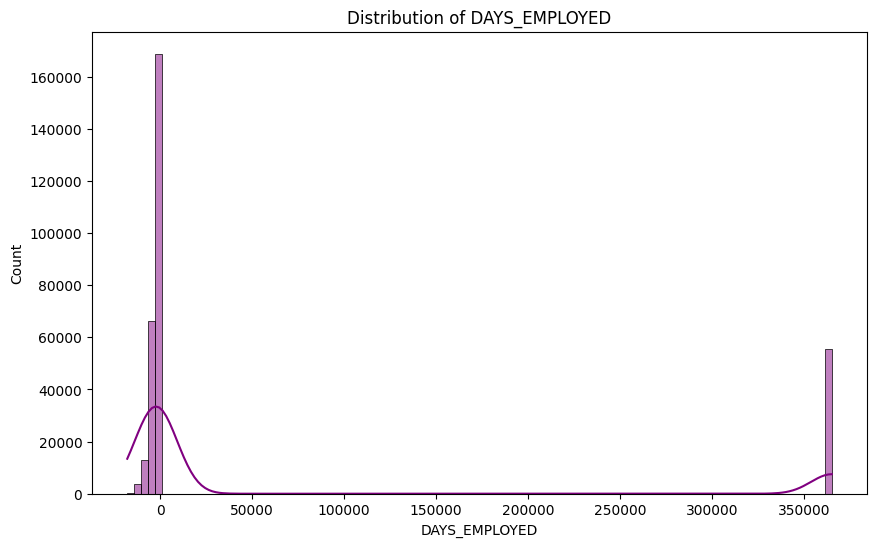

In [123]:
plot_distribution('DAYS_EMPLOYED','purple')

Negative values likely indicate days since employment, suggesting unemployment. However, the extremely large values at the far end seem unrealistic, as it is unlikely that many people have been employed for over 100 years.

### Days of registration distribution

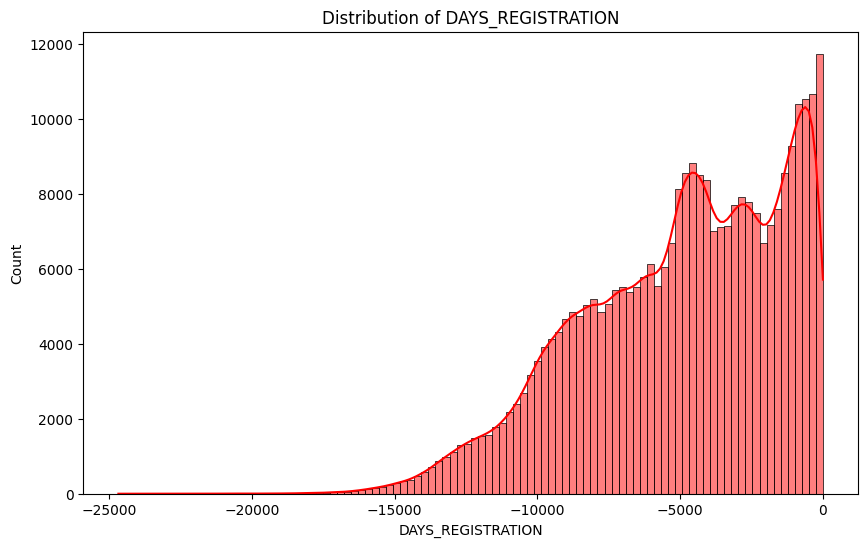

In [124]:
plot_distribution('DAYS_REGISTRATION','red')

### Days ID publish distribution

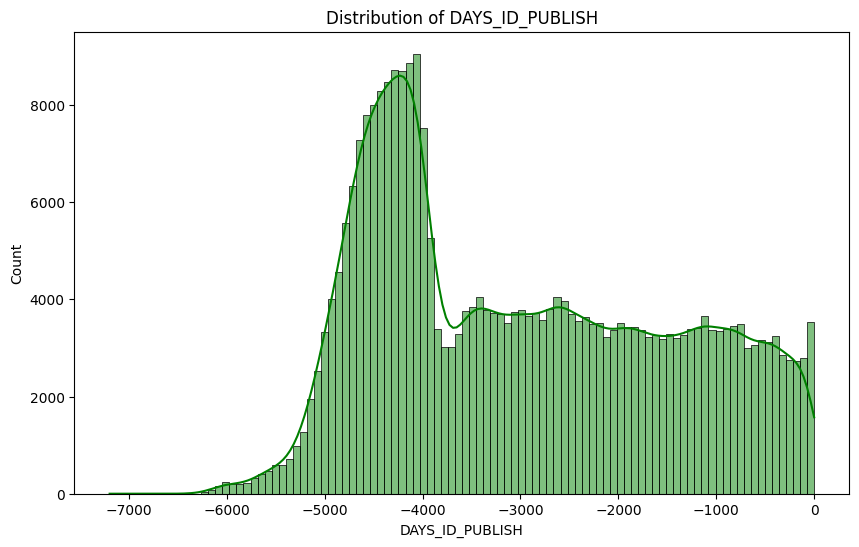

In [127]:
plot_distribution('DAYS_ID_PUBLISH','green')

### Comparison of interval values with TARGET = 1 and TARGET = 0

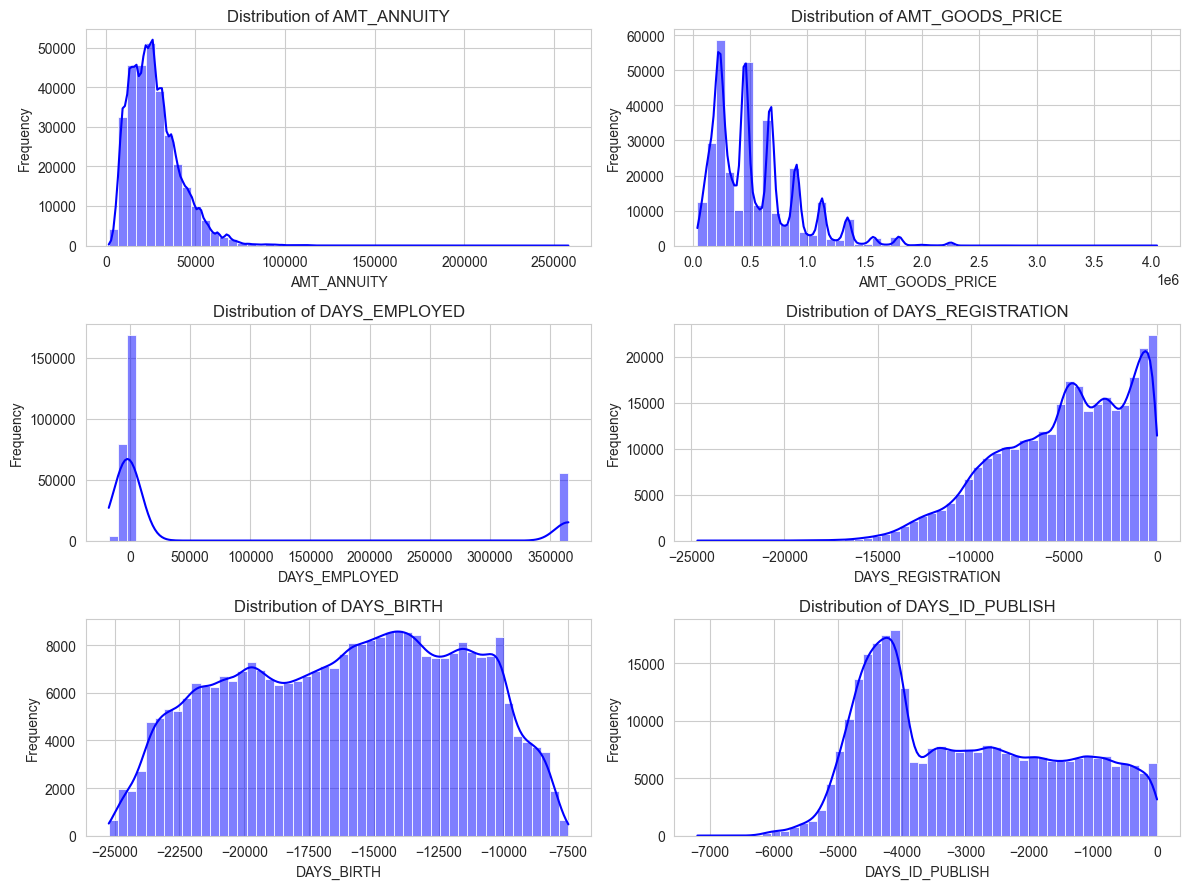

In [130]:
# Define variables
variables = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH']

def plot_distribution_comp(variables, nrows=3, ncols=2, figsize=(12, 9)):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()

    for i, var in enumerate(variables):
        sns.histplot(application_train[var].dropna(), kde=True, bins=50, ax=axes[i], color="blue")
        axes[i].set_title(f'Distribution of {var}')
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

plot_distribution_comp(variables)

### Region registered not live region and not work region

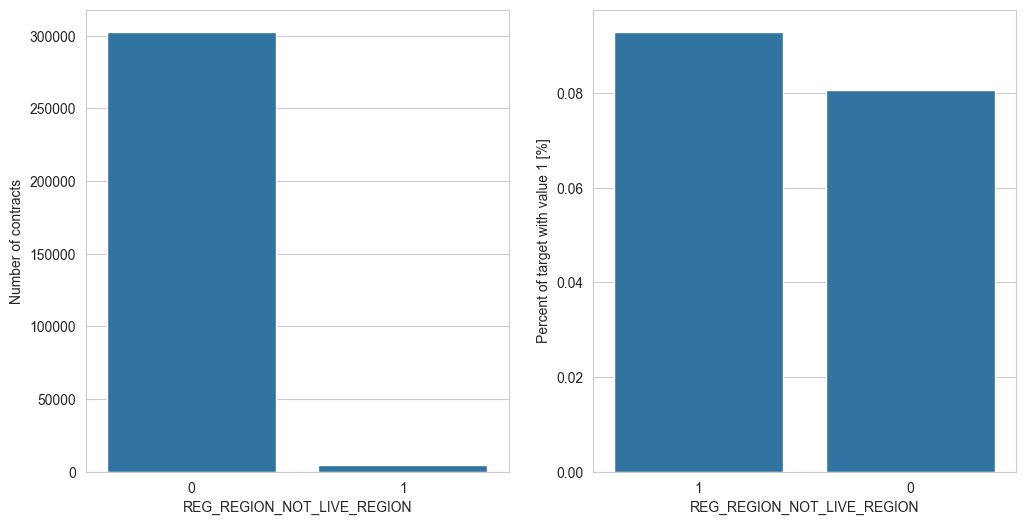

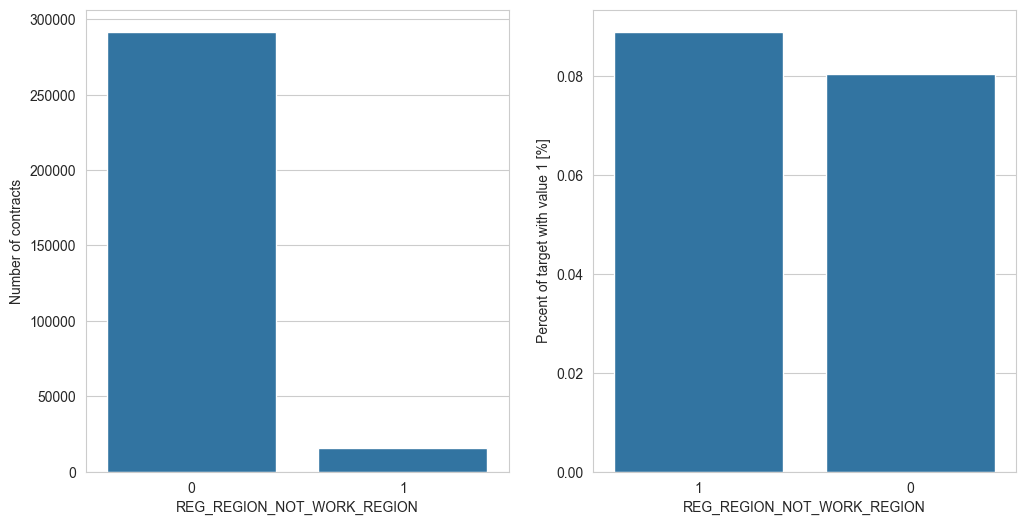

In [131]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

Very few people are registered in non-residential or non-work regions. The loan non-repayment rate for these cases is slightly higher than average, at just over 8% compared to approximately 8% for others.

### City registered not live city and not work city

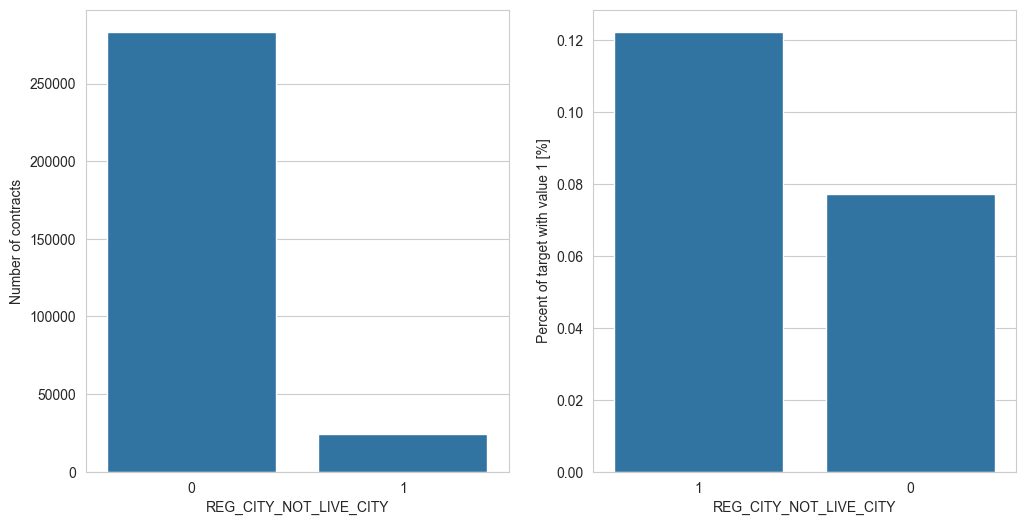

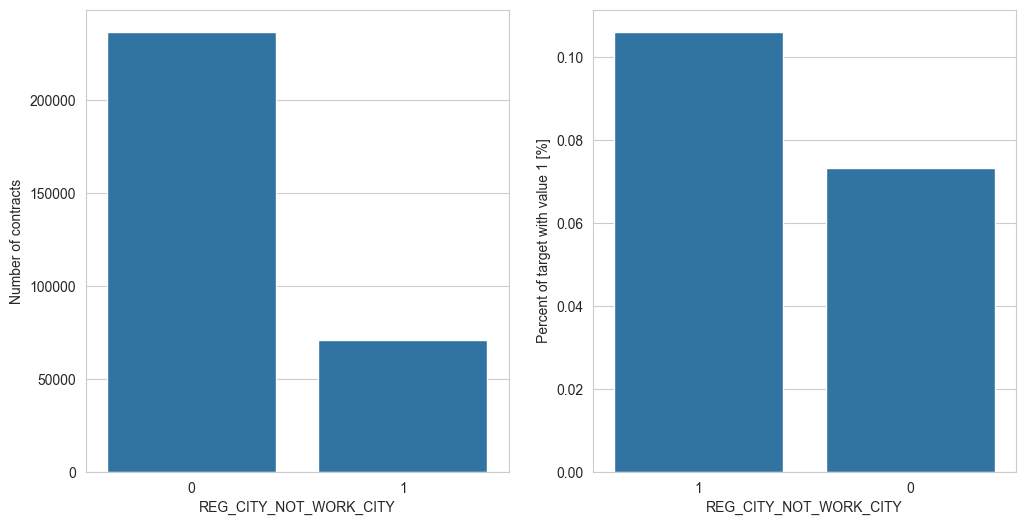

In [132]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

Most people register in the city where they live or work, with more registering differently for work than for residence. Those who register in a different city have higher loan non-repayment rates (11% for work, 12% for residence) compared to those who register in the same city.

# Bureau data 

The bureau dataset includes all previous credits of clients from other financial institutions, as reported to the Credit Bureau, for those who have a loan in the sample. Each loan in the sample has multiple rows corresponding to the number of past credits recorded before the application date. The key SK_ID_CURR links application_train and application_test with the bureau dataset.

Now, let's merge application_train with bureau.

In [133]:
application_bureau_train = application_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [134]:
print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ", 
      application_bureau_train.shape[1]," columns.")

The resulting dataframe `application_bureau_train` has  1465325  rows and  138  columns.


In [135]:
def plot_b_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_bureau_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_bureau_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))

    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

### Credit status

Let's analyze the distribution of credit statuses by first examining the number of credits in each category, such as Closed, Active, Sold, and Bad Debt.

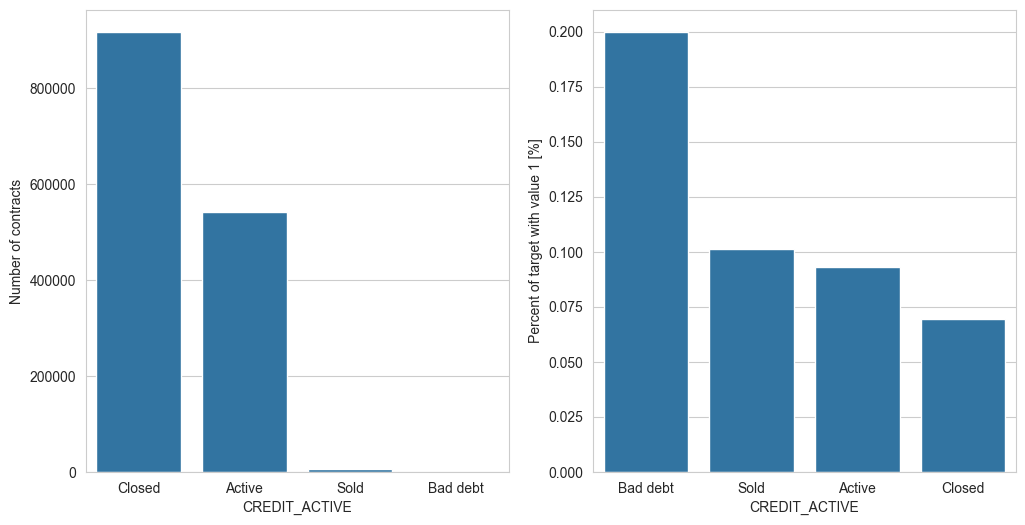

In [136]:
plot_b_stats('CREDIT_ACTIVE')

Most credits recorded at the Credit Bureau are Closed (~900K), followed by Active credits (just under 600K), while Sold and Bad Debt categories have significantly fewer records.

In terms of default rates (TARGET = 1), clients with Bad Debt history have the highest default rate on current applications at 20%. In contrast, clients with Sold, Active, or Closed credits have default rates at or below 10%, which aligns with the overall average. The lowest default rate is observed among clients with Closed credits.

This suggests that credit history at the Credit Bureau is a strong predictor of loan default, as applicants with Bad Debt history are twice as likely to default compared to those with Sold or Active credits and nearly three times more likely than those with Closed credits.

### Credit currency

Let's analyze the number of credits recorded at the Credit Bureau in different currencies. Additionally, we'll examine the default rate (TARGET = 1) for current applications based on the currency of past credits registered for the same client.

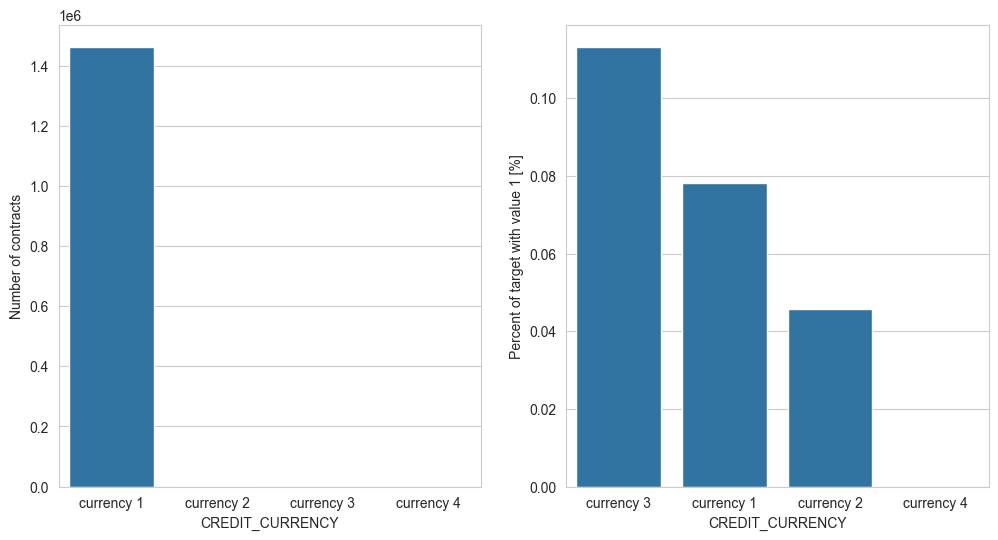

In [137]:
plot_b_stats('CREDIT_CURRENCY')

Most credits are in currency_1. Default rates vary by currency, with currency_3 having the highest default rate at 11%, followed by currency_1 at 8% and currency_2 at 5%. Clients with credits in currency_4 have a near 0% default rate.

### Credit type

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\1508653915.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\1508653915.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


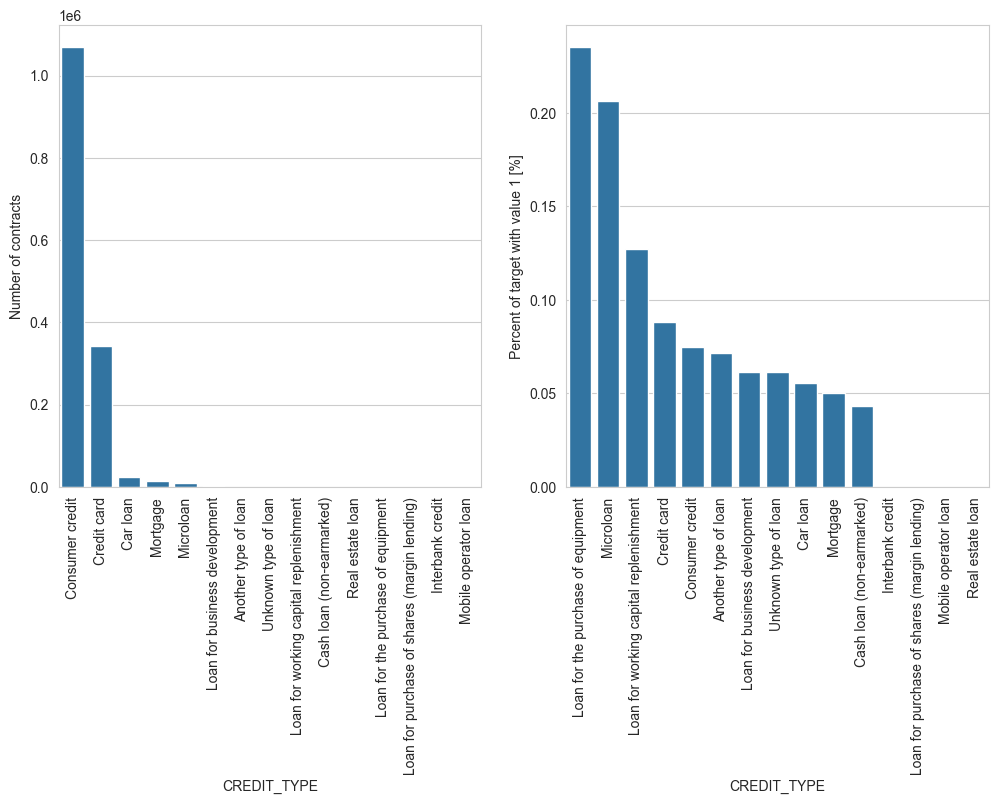

In [138]:
plot_b_stats('CREDIT_TYPE', True, True)

Most historical credits recorded at the Credit Bureau are consumer credit and credit cards, while car loans, mortgages, and microloans are less common. Certain credit types have a higher default rate on current loans, with loans for the purchase of equipment and microloans both exceeding a 20% default rate, while loans for working capital replenishment have a default rate of over 12%.

### Duration of credit (DAYS_CREDIT)

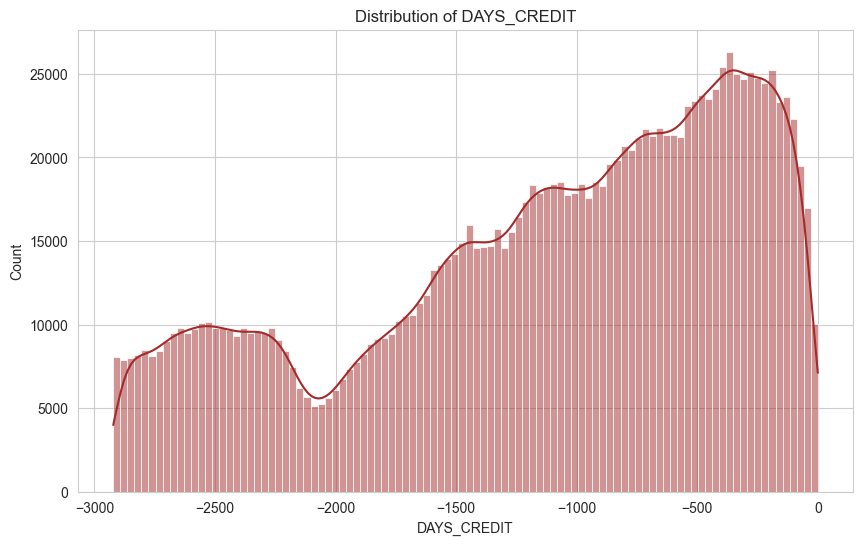

In [141]:
def plot_b_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.histplot(application_bureau_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show() 
    
plot_b_distribution('DAYS_CREDIT','brown')

Credit duration ranges from less than 3,000 days, with a local dip around 2,000 days, and an increasing frequency for shorter durations, peaking at around 300 days (less than a year).

### Credit overdue (CREDIT_DAY_OVERDUE)

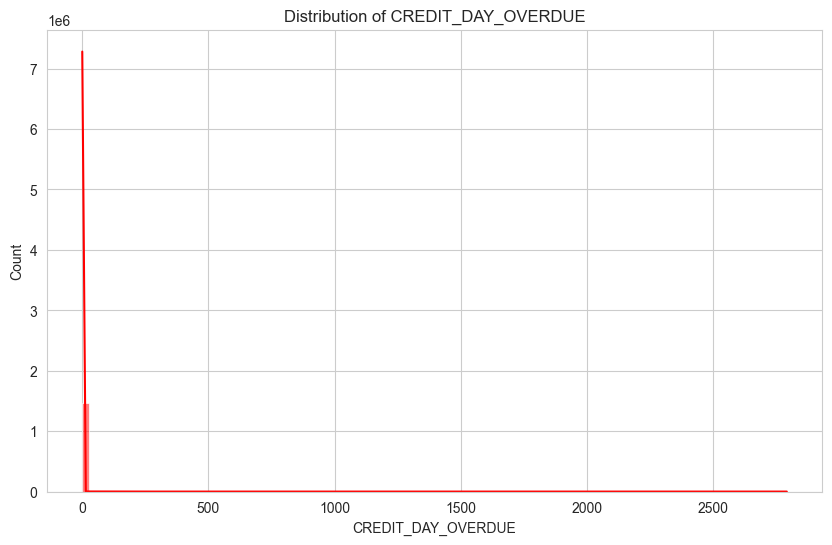

In [143]:
plot_b_distribution('CREDIT_DAY_OVERDUE','red')

Most credits have 0 or very few days overdue, while the maximum overdue duration reaches around 3,000 days.

### Credit sum (AMT_CREDIT_SUM)

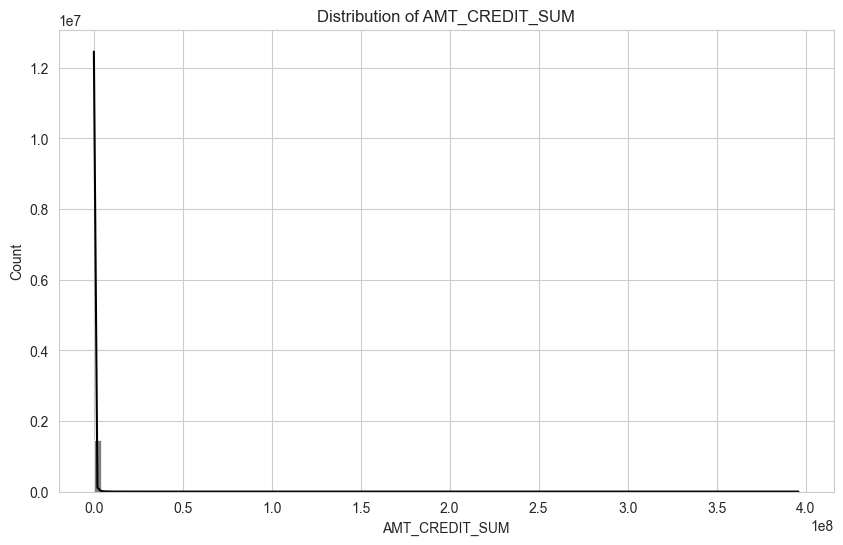

In [146]:
plot_b_distribution('AMT_CREDIT_SUM','black')

The AMT_CREDIT_SUM distribution is concentrated in the lower credit sum range. To better visualize the distribution around 0, we will first remove outliers using a predefined threshold.

Next, we will create a function to identify and filter outliers, then modify it to display the distribution after filtering.

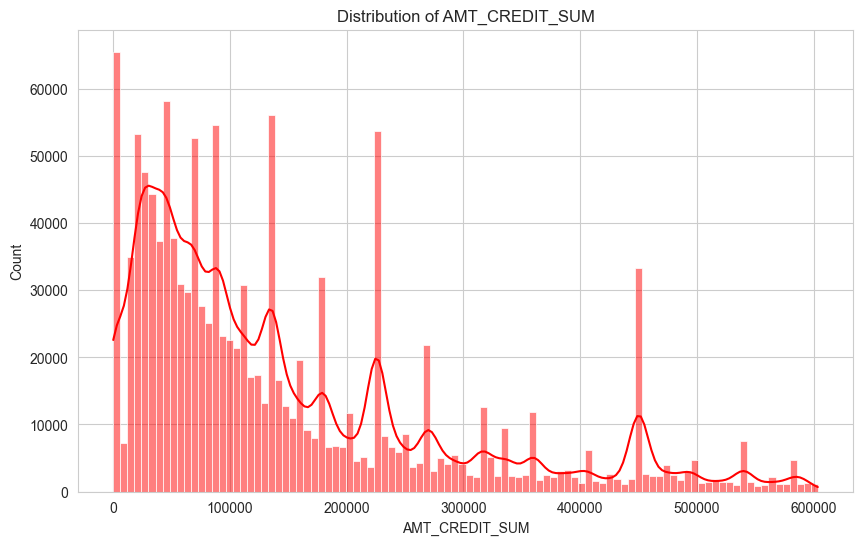

In [150]:
def is_outlier(points, thresh=3.5):
    points = np.asarray(points)  # Ensure input is an array
    if points.ndim == 1:
        points = points[:, None]
    
    median = np.median(points, axis=0)
    diff = np.sqrt(np.sum((points - median) ** 2, axis=-1))
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation
    return modified_z_score > thresh

def plot_b_o_distribution(feature, color):
    plt.figure(figsize=(10,6))
    plt.title(f"Distribution of {feature}")
    
    # Drop NaN values
    x = application_bureau_train[feature].dropna()
    
    # Identify outliers
    outliers = is_outlier(x.values)
    
    # Filter out outliers
    filtered_x = x[~outliers]
    
    # Plot distribution
    sns.histplot(filtered_x, color=color, kde=True, bins=100)
    
    plt.show()

# Example usage
plot_b_o_distribution('AMT_CREDIT_SUM', 'red')


The distribution shows multiple peaks, with the highest concentration around 20,000, while several smaller peaks appear at higher values.

### Credit sum limit (AMT_CREDIT_SUM_LIMIT)

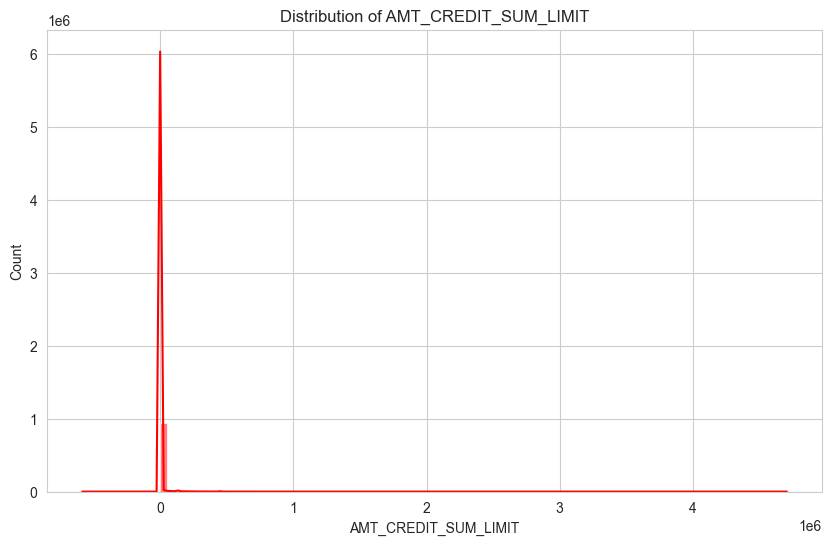

In [152]:
plot_b_distribution('AMT_CREDIT_SUM_LIMIT','red')

### Comparison of interval values with TARGET = 1 and TARGET = 0

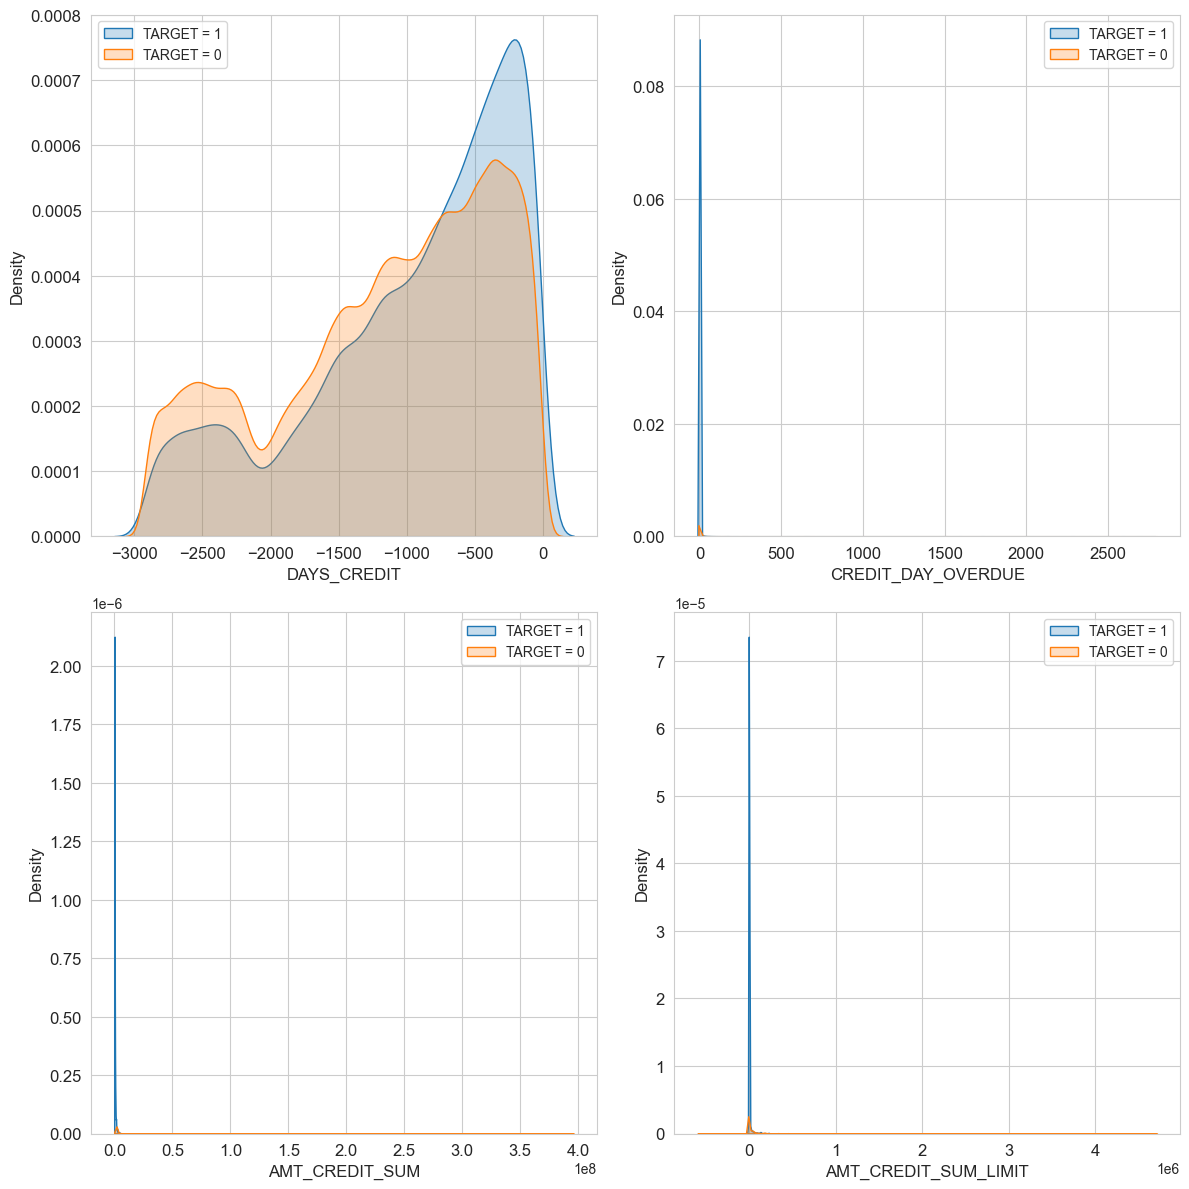

In [156]:
# Plotting in same graph

def plot_b_distribution_comp(var, nrow=2):
    t1 = application_bureau_train[application_bureau_train['TARGET'] != 0]
    t0 = application_bureau_train[application_bureau_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    fig, axes = plt.subplots(nrow, 2, figsize=(12, 6 * nrow))

    axes = axes.flatten()  # Flatten in case of multiple rows

    for i, feature in enumerate(var):
        sns.kdeplot(t1[feature].dropna(), label="TARGET = 1", fill=True, common_norm=False, ax=axes[i])
        sns.kdeplot(t0[feature].dropna(), label="TARGET = 0", fill=True, common_norm=False, ax=axes[i])

        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)
        axes[i].tick_params(axis='both', which='major', labelsize=12)
        axes[i].legend()

    plt.tight_layout()
    plt.show()

var = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_LIMIT']
plot_b_distribution_comp(var, nrow=2)


## Previous Application Data

The previous_application dataset contains details of all past Home Credit loan applications for clients in the sample, with each row representing a previous application. The key SK_ID_CURR links application_train and application_test with previous_application.

Now, let's merge application_train with previous_application.

In [157]:
application_prev_train = application_train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [158]:
print("The resulting dataframe `application_prev_train` has ",application_prev_train.shape[0]," rows and ", 
      application_prev_train.shape[1]," columns.")

The resulting dataframe `application_prev_train` has  1413701  rows and  158  columns.


In [159]:
def plot_p_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_prev_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_prev_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))

    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

### Contract type

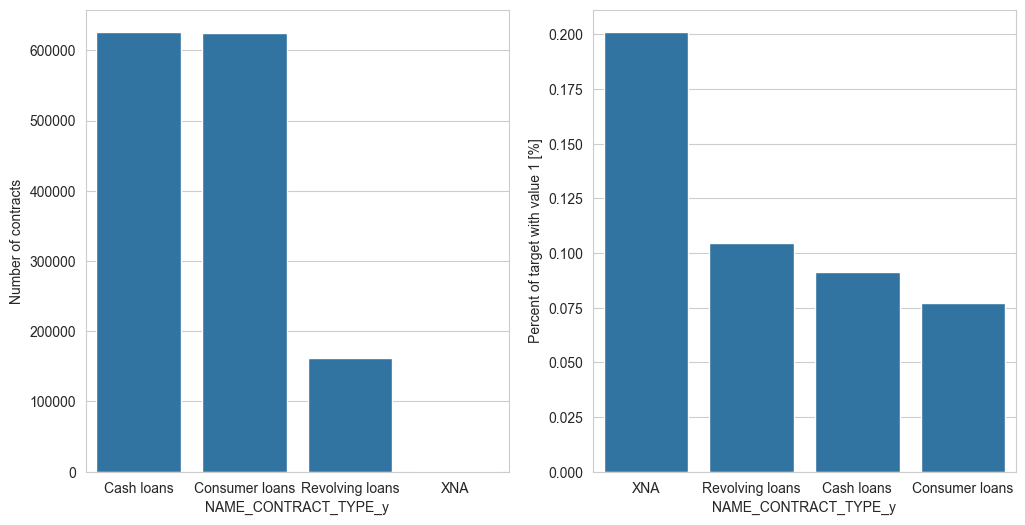

In [160]:
plot_p_stats('NAME_CONTRACT_TYPE_y')

The previous_application dataset includes three contract types: Cash Loans, Consumer Loans, and Revolving Loans. Cash and Consumer Loans are nearly equal in number (~600K each), while Revolving Loans are fewer (~150K).

Default rates vary by contract type, with Revolving Loans having the highest default rate (~10%), followed by Cash Loans (~9.5%) and Consumer Loans (~8%).

### Cash loan purpose

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\2859922210.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\2859922210.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


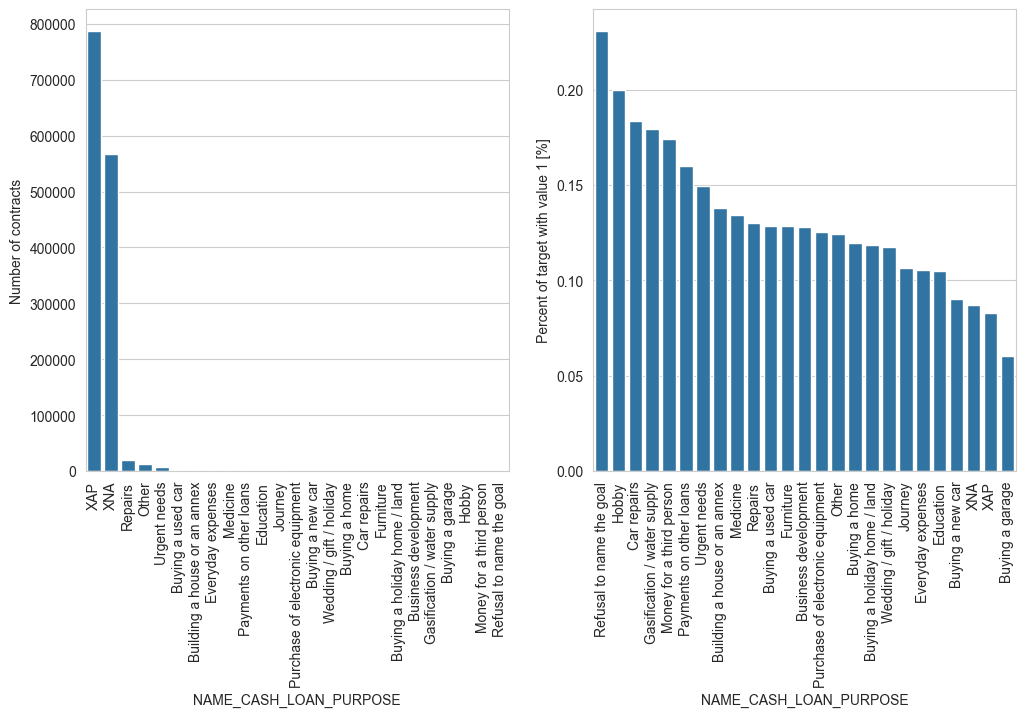

In [161]:
plot_p_stats('NAME_CASH_LOAN_PURPOSE', True, True)

Excluding unidentified or unavailable categories, the largest number of contracts are for Repairs, Other, Urgent Needs, Buying a Used Car, and Building a House or Annex.

In terms of default rates for current applications, clients with previous applications show the highest default rates when their history includes cash loans for Refusal to Name the Goal (~23%), Hobby (20%), and Car Repairs (~18%), which aligns with expectations.

### Contract status

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\2859922210.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\2859922210.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


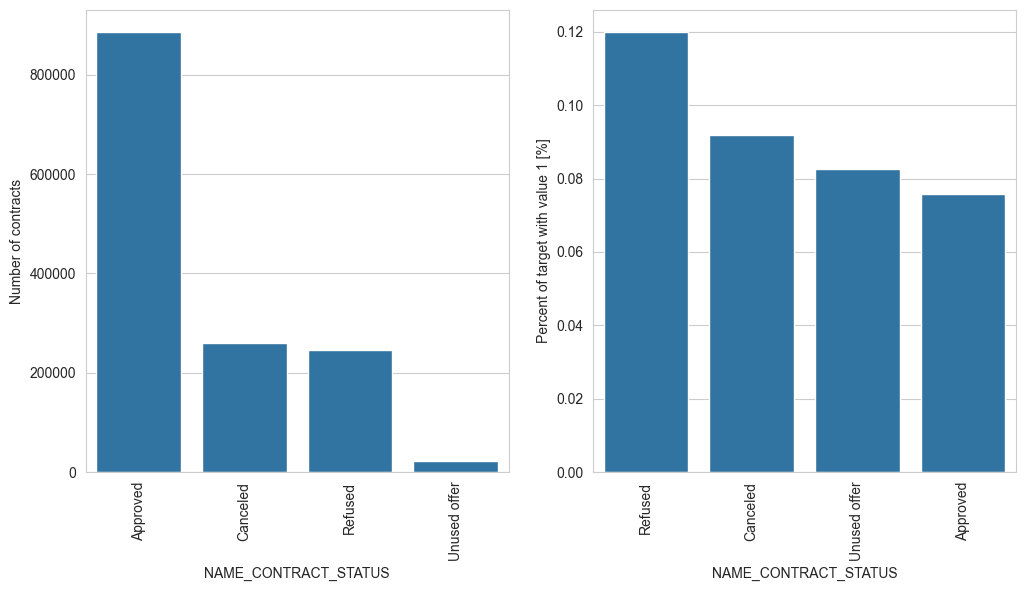

In [162]:
plot_p_stats('NAME_CONTRACT_STATUS', True, True)

Most previous application contract statuses are Approved (~850K), followed by Canceled and Refused (~240K each), with Unused Offers (~20K) being the least common.

For current applications, default rates are highest among clients with a history of Refused contracts (12%), followed by Canceled (9%), Unused Offers (~8%), and the lowest default rate for Approved contracts (less than 8%).

### Payment Type

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\2859922210.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_34092\2859922210.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


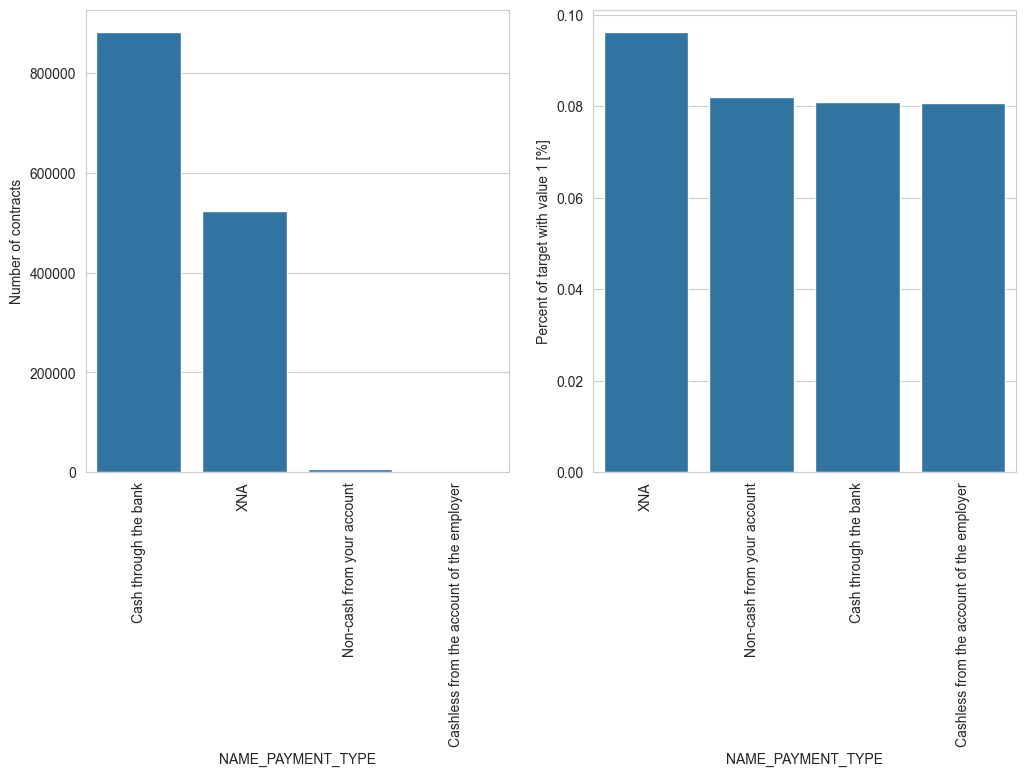

In [163]:
plot_p_stats('NAME_PAYMENT_TYPE', True, True)

Most previous applications were paid in Cash through the bank (~850K), while Non-cash from the account and Cashless from the employer's account are much less common. All three payment types have a similar default rate for current clients, at approximately 8% each.

### Client Type

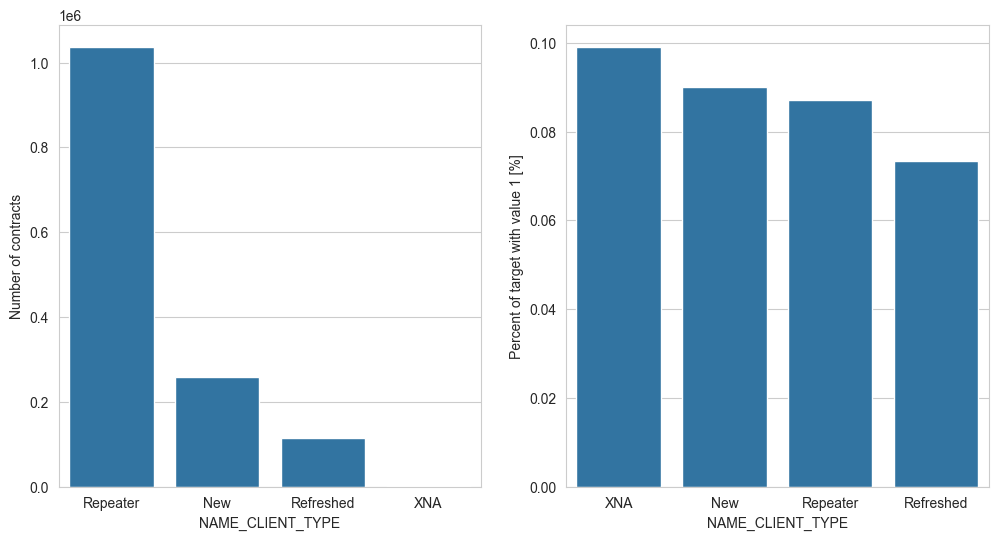

In [165]:
plot_p_stats('NAME_CLIENT_TYPE')

Most previous applications are from Repeater clients (~1M), followed by New clients (~200K) and Refreshed clients (~100K).

For current applications, default rates vary based on past client types, with New clients at 8.5%, Repeaters at 8.25%, and Refreshed clients at 7%.